In [344]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report,accuracy_score

np.random.seed(1212)

In [302]:
# load complete dataset
df_train = pd.read_csv('../inputs/mnsit/train.csv')
df_test = pd.read_csv('../inputs/mnsit/test.csv')

In [303]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

X_test = np.reshape(X_test.values,(28000,28,28))
X_train = np.reshape(df_features.values,(42000,28,28))
classes_train = df_label.values

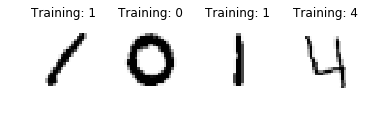

In [304]:
#Show sample images
for index, image in enumerate(X_train[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % classes_train[index])

In [305]:
#training procedure
def fit(images,classes):
    #initialize random output layer weight matrix
    output_layers = [np.random.randint(low=0,high=255, size=np.shape(images[0])) for _ in range(10)]
    # for each image in training set
#     print(len(images))
    for index,image in enumerate(images):
        # stack the input layer 10 times to create (10,8,8) ndarray similar to shape of output layer weight matrix.
        # this becomes input (xi)
        q = np.dstack([image.T]*10).transpose()
        # multiply the output and input layer and sum on 1st axis twice to get sum for all nodes in output layer
        # linear neurons
        # find max to get the predicted node
        predicted_class = np.argmax(np.sum(np.sum(output_layers*q,axis=1),axis=1))
        actual_class = classes[index]
        # update weights
        output_layers[predicted_class] = output_layers[predicted_class] - image
        output_layers[actual_class]  = output_layers[actual_class] + image
    return output_layers

In [306]:
def predict(images,weights):
    predictions = []
    for index,image in enumerate(images):
        # stack the input layer 10 times to create (10,8,8) ndarray similar to shape of output layer weight matrix.
        # this becomes input (xi)
        q = np.dstack([image.T]*10).transpose()
        # multiply the output and input layer and sum on 1st axis twice to get sum for all nodes in output layer
        # linear neurons
        # find max to get the predicted node
        predicted_class = np.argmax(np.sum(np.sum(weights*q,axis=1),axis=1))
        predictions.append(predicted_class)
    return (predictions)

In [307]:
images_train, images_test, labels_train, labels_test = train_test_split(X_train, classes_train, test_size = 0.3, random_state=42)

# We Observe that the final output layers are taking a basic shape of the digits, as shown in the course. 
# Using a 32*32 dimension image will result in a better result

In [350]:
final_op_layer = fit(X_train,classes_train)

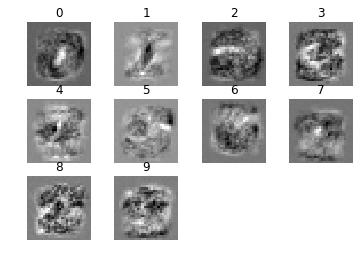

In [351]:
%matplotlib inline
for index, image in enumerate(final_op_layer):
        plt.subplot(3, 4,index+1)
        plt.axis('off')
        plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('%i' % index)
    

In [352]:
pred = predict(images_test, final_op_layer)

In [353]:
print(accuracy_score(pred,labels_test.tolist()))
print(classification_report(pred, labels_test.tolist()))

0.8740476190476191
             precision    recall  f1-score   support

          0       0.98      0.92      0.95      1279
          1       0.98      0.92      0.95      1469
          2       0.82      0.94      0.88      1120
          3       0.92      0.80      0.85      1560
          4       0.95      0.81      0.88      1430
          5       0.76      0.84      0.80       981
          6       0.82      0.98      0.89      1048
          7       0.93      0.86      0.89      1463
          8       0.88      0.78      0.83      1359
          9       0.69      0.95      0.80       891

avg / total       0.89      0.87      0.88     12600



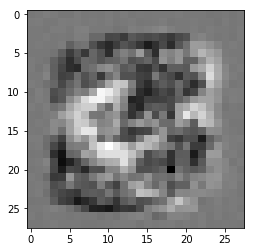

In [354]:
plt.imshow(final_op_layer[3], cmap=plt.cm.gray_r, interpolation='nearest')